In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wine-quality/winequalityN.csv


In [2]:
df = pd.read_csv('/kaggle/input/wine-quality/winequalityN.csv')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# load dataset

In [3]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


# Preprocessing the dataset

In [5]:
#check for null values
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [6]:
#fill the missing values
for col, value in df.items():
    if col != 'type':
        df[col] = df[col].fillna(df[col].mean())

In [7]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Exploratory analysis

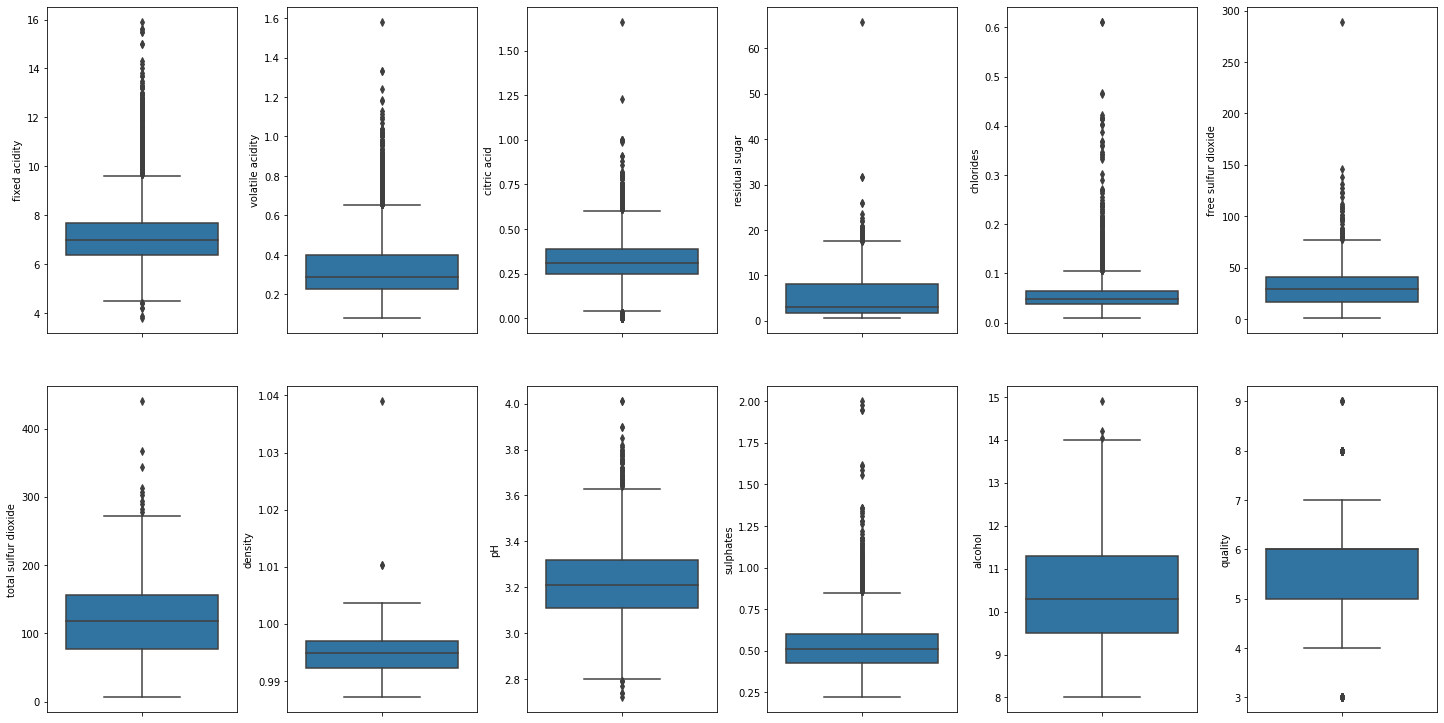

In [8]:
#create boxplot
fig,ax = plt.subplots(ncols=6, nrows = 2,figsize =(20,10))
index=0
ax = ax.flatten()

for col,value in df.items():
    if col!='type':
        sns.boxplot(y=col,data=df,ax = ax[index])
        index+=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)
        

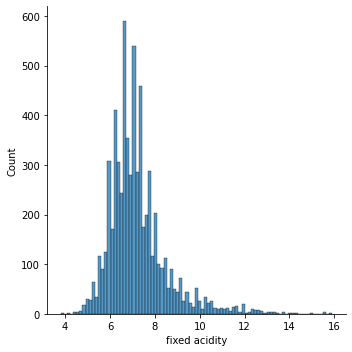

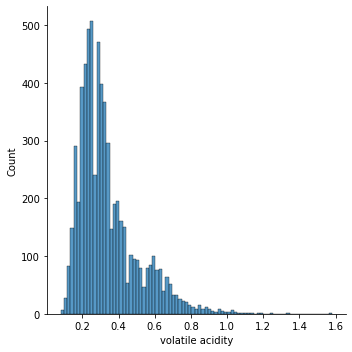

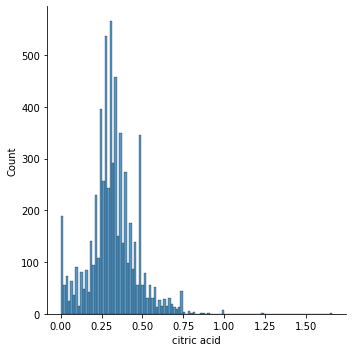

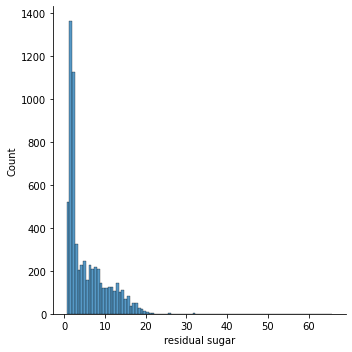

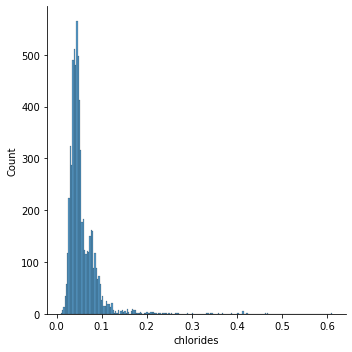

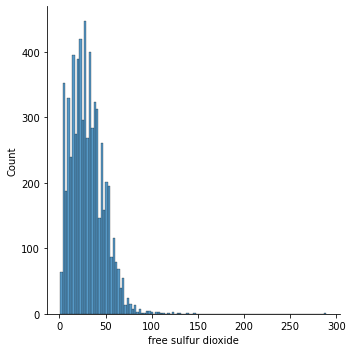

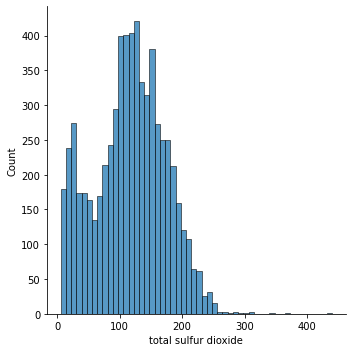

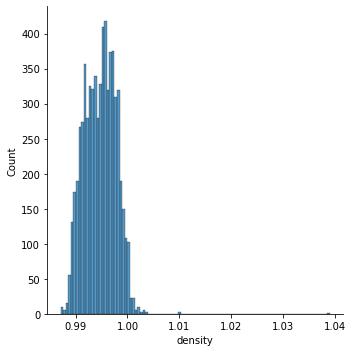

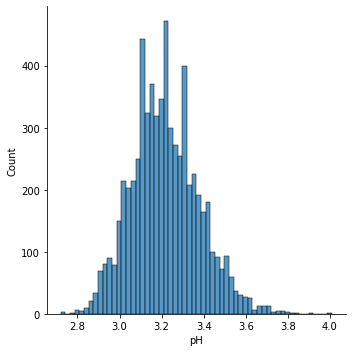

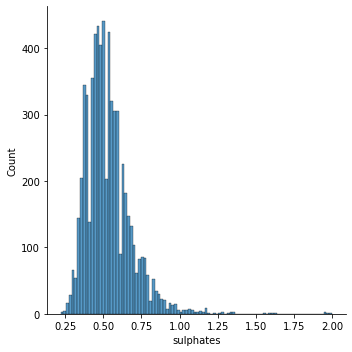

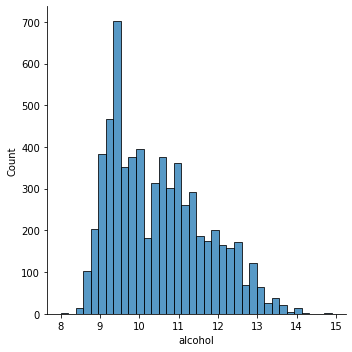

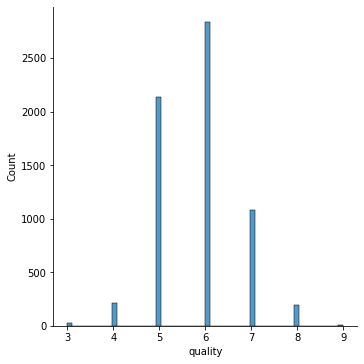

In [9]:
#create displot
#fig, ax = plt.subplots(ncols= 6,nrows =2, figsize= (20,10))
index =0
ax = ax.flatten()
for col,value in df.items():
    if col!= 'type':
        sns.displot(value, ax = ax[index])
        index+=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

In [10]:
#log tranformation
df['free sulfur dioxide_log']= np.log(df['free sulfur dioxide'])

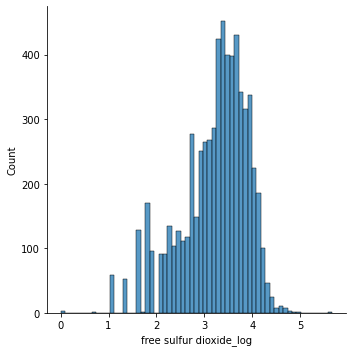

In [11]:
sns.displot(df['free sulfur dioxide_log'])

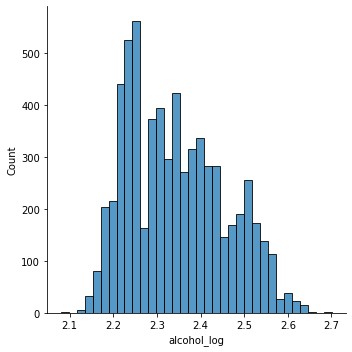

In [12]:
df['alcohol_log']= np.log(df['alcohol'])
sns.displot(df['alcohol_log'])

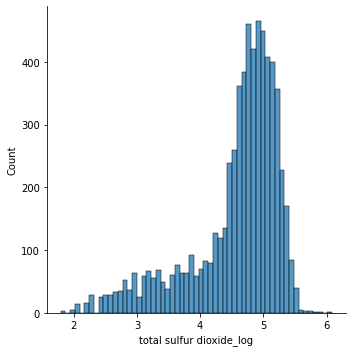

In [13]:
df['total sulfur dioxide_log']= np.log(df['total sulfur dioxide'])
sns.displot(df['total sulfur dioxide_log'])

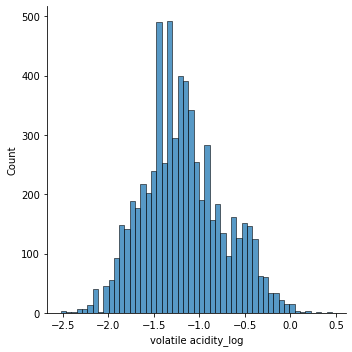

In [14]:
df['volatile acidity_log']= np.log(df['volatile acidity'])
sns.displot(df['volatile acidity_log'])

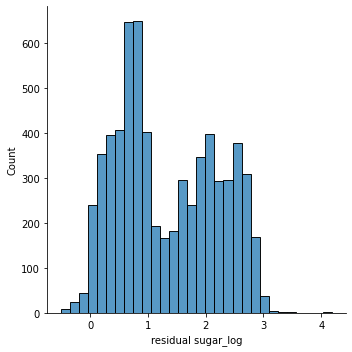

In [15]:
df['residual sugar_log']= np.log(df['residual sugar'])
sns.displot(df['residual sugar_log'])

In [16]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,free sulfur dioxide_log,alcohol_log,total sulfur dioxide_log,volatile acidity_log,residual sugar_log
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,3.806662,2.174752,5.135798,-1.309333,3.030134
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,2.639057,2.251292,4.882802,-1.203973,0.470004
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,3.401197,2.312535,4.574711,-1.272966,1.931521
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,3.850148,2.292535,5.225747,-1.469676,2.140066
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,3.850148,2.292535,5.225747,-1.469676,2.140066


In [17]:
col = ['residual sugar','alcohol','free sulfur dioxide','volatile acidity','total sulfur dioxide']
df = df.drop(columns = col, axis =1)
df.head()

,type,fixed acidity,citric acid,chlorides,density,pH,sulphates,quality,free sulfur dioxide_log,alcohol_log,total sulfur dioxide_log,volatile acidity_log,residual sugar_log
0,white,7.0,0.36,0.045,1.0010,3.00,0.45,6,3.806662,2.174752,5.135798,-1.309333,3.030134
1,white,6.3,0.34,0.049,0.9940,3.30,0.49,6,2.639057,2.251292,4.882802,-1.203973,0.470004
2,white,8.1,0.40,0.050,0.9951,3.26,0.44,6,3.401197,2.312535,4.574711,-1.272966,1.931521
3,white,7.2,0.32,0.058,0.9956,3.19,0.40,6,3.850148,2.292535,5.225747,-1.469676,2.140066
4,white,7.2,0.32,0.058,0.9956,3.19,0.40,6,3.850148,2.292535,5.225747,-1.469676,2.140066


<AxesSubplot:xlabel='type', ylabel='count'>

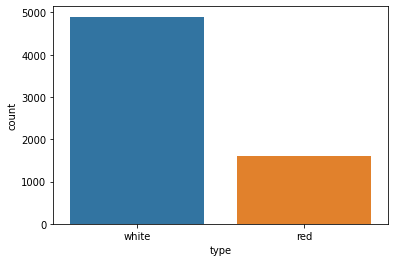

In [18]:
sns.countplot(df['type'])

<AxesSubplot:xlabel='quality', ylabel='count'>

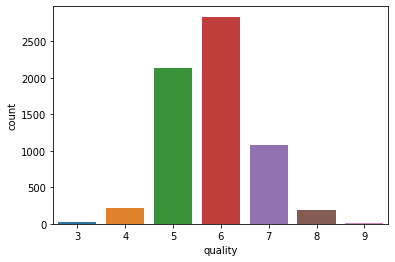

In [19]:
sns.countplot(df['quality'])

# correlation matrix

In [20]:
df.corr()

,fixed acidity,citric acid,chlorides,density,pH,sulphates,quality,free sulfur dioxide_log,alcohol_log,total sulfur dioxide_log,volatile acidity_log,residual sugar_log
fixed acidity,1.000000,0.323349,0.298282,0.458941,-0.251683,0.300225,-0.076967,-0.347356,-0.089117,-0.396965,0.225545,-0.092684
citric acid,0.323349,1.000000,0.039310,0.096307,-0.328354,0.057564,0.085699,0.115731,-0.013935,0.177095,-0.331500,0.125399
chlorides,0.298282,0.039310,1.000000,0.362580,0.044754,0.395073,-0.200818,-0.248489,-0.256320,-0.331824,0.365035,-0.117735
density,0.458941,0.096307,0.362580,1.000000,0.011913,0.259432,-0.305858,-0.053429,-0.688593,-0.106158,0.266683,0.510745
pH,-0.251683,-0.328354,0.044754,0.011913,1.000000,0.191075,0.019356,-0.145339,0.128471,-0.250508,0.218117,-0.245355
sulphates,0.300225,0.057564,0.395073,0.259432,0.191075,1.000000,0.038713,-0.224320,0.001134,-0.319554,0.227695,-0.171610
quality,-0.076967,0.085699,-0.200818,-0.305858,0.019356,0.038713,1.000000,0.113564,0.440520,0.009365,-0.262770,-0.012731
free sulfur dioxide_log,-0.347356,0.115731,-0.248489,-0.053429,-0.145339,-0.224320,0.113564,1.000000,-0.143089,0.783585,-0.380844,0.385916
alcohol_log,-0.089117,-0.013935,-0.256320,-0.688593,0.128471,0.001134,0.440520,-0.143089,1.000000,-0.187699,-0.024835,-0.322324
total sulfur dioxide_log,-0.396965,0.177095,-0.331824,-0.106158,-0.250508,-0.319554,0.009365,0.783585,-0.187699,1.000000,-0.437535,0.412601


<AxesSubplot:>

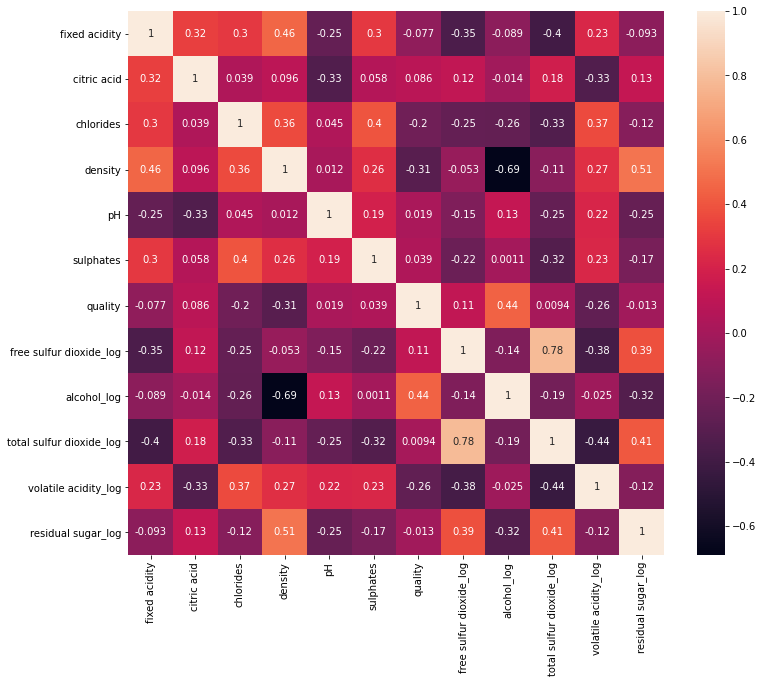

In [21]:
plt.figure(figsize = (12,10))
sns.heatmap(df.corr(), annot = True)

# input split

In [22]:
x = df.drop(columns = ['type','quality'])
y = df['quality']


# Class Imbalancement

In [23]:
y.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [24]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=4)
# TRANSFORM THE DATASET
x,y = oversample.fit_resample(x,y)

In [25]:
y.value_counts()

3    2836
4    2836
5    2836
6    2836
7    2836
8    2836
9    2836
Name: quality, dtype: int64

# model training

In [26]:
#classify function
from sklearn.model_selection import cross_val_score, train_test_split
def classify(model,x,y):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=34)
    #train model
    model.fit(x_train,y_train)
    print('Accuracy ', model.score(x_test,y_test)*100)
    
    #cross validation
    score = cross_val_score(model,x,y,cv=5)
    print('CV Score ', np.mean(score)*100)

In [27]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model,x,y)

Accuracy  40.58029417690913
CV Score  37.7945748997613


In [28]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model,x,y)

Accuracy  81.20088656054806
CV Score  76.37523049666758


In [29]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model,x,y)

Accuracy  89.17993149304856
CV Score  83.64906656382199


In [30]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
classify(model,x,y)

Accuracy  89.94559742091477
CV Score  84.9285201844354


In [31]:
from xgboost import XGBClassifier
model = XGBClassifier()
classify(model,x,y)

[14:43:52] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy  88.15232722143864
[14:44:03] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:44:14] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:44:24] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if 

In [32]:
import lightgbm
model = lightgbm.LGBMClassifier()
classify(model,x,y)


Accuracy  87.54785412049164
CV Score  81.43284403867585
